In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import bernoulli
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')


df = pd.DataFrame()

class Simulation:
    clock = 0.0
    def __init__(self):
        self.num_in_system = 0
        self.t_arrival = self.generate_interarrival()
        self.t_depart = float('inf') 
        self.num_arrivals = 0
        self.num_departs = 1
        self.area_under_qt=0
        self.area_under_bt=0
        self.number_serviced=0
        self.total_wait = 0.0
        self.tmp_time = self.generate_service()
        self.sum_service=0
        self.depar=[]
        
    def advance_time(self):
        t_event = min(self.t_arrival, self.t_depart)
        self.total_wait += self.num_in_system*abs(Simulation.clock-t_event)
        Simulation.clock = t_event
        if self.t_arrival <= self.t_depart:
            self.handle_arrival_event()
        else:
            self.handle_depart_event()
    
    def handle_arrival_event(self):
        self.num_in_system += 1
        self.num_arrivals += 1
        if self.num_in_system <= 1:
            self.temp1 = self.generate_service()
            self.tmp_time=self.temp1
            self.t_depart = Simulation.clock + self.temp1
            self.area_under_qt+=self.num_in_system*abs(Simulation.clock-self.temp1)
            
        self.t_arrival = self.clock + self.generate_interarrival()
        
    def handle_depart_event(self):
        self.num_in_system -= 1
        self.num_departs += 1
        if self.num_in_system > 0:
            self.temp2=self.generate_service();
            self.sum_service+=self.temp2
            self.tmp_time = self.temp2
            self.t_depart = Simulation.clock + self.temp2
            self.depar.append(self.t_depart)
            self.number_serviced+=1
            self.area_under_bt += self.t_depart-Simulation.clock

        else:
            self.t_depart = float("inf")
    
    def generate_interarrival(self):
        return np.random.exponential(scale=1)
    def generate_service(self):
        return np.random.exponential(scale=2)

np.random.seed(0)


In [3]:
class Simulation2():

    def __init__(self,arriv_scale,serv_scale):
        self.clock=0
        self.num_in_system = 0
        self.area_under_qt=0
        self.area_under_bt=0
        self.number_serviced=0
        self.serv_scale=serv_scale
        self.arriv_scale=arriv_scale
        self.t_arrival = self.generate_interarrival()
        self.t_depart = float('inf') 
        self.num_arrivals = 0
        self.num_departs = 1
        self.total_wait = 0.0
        self.sum_service=0
        self.tmp_time = self.generate_service()
        self.depar=[]    
        
    def advance_time(self,arrive):
        t_event = min(arrive, self.t_depart)
        self.total_wait += self.num_in_system*abs(self.clock-t_event)
        Simulation2.clock = t_event
        if self.t_arrival <= self.t_depart:
            self.handle_arrival_event(arrive)
        else:
            self.handle_depart_event()
    
    def handle_arrival_event(self,arrive):
        self.num_in_system += 1
        self.num_arrivals += 1
        if self.num_in_system <= 1:
            self.temp1 = self.generate_service()
            self.tmp_time=self.temp1
            self.t_depart = self.clock + self.temp1
            self.area_under_qt+=self.num_in_system*abs(self.clock-self.temp1)
        self.t_arrival = arrive;
        
    def handle_depart_event(self):
        self.num_in_system -= 1
        self.num_departs += 1
        if self.num_in_system > 0:
            self.temp2=self.generate_service();
            self.sum_service+=self.temp2            
            self.tmp_time = self.temp2
            self.t_depart = self.clock + self.temp2
            self.depar.append(self.t_depart)
            
            self.number_serviced+=1
            self.area_under_bt += self.t_depart-self.clock

        else:
            self.t_depart = float("inf")
    
    def generate_interarrival(self):
        return np.random.exponential(scale=self.arriv_scale)
    
    def generate_service(self):
        return np.random.exponential(scale=self.serv_scale)


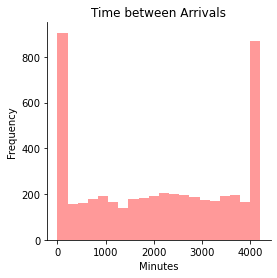

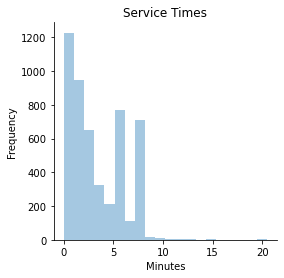

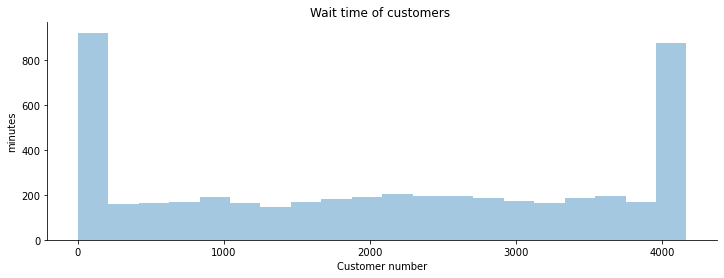

In [4]:
ncust=5000
s = Simulation()

clock_time = []
arrival_times = []
service_times = []
waiting_times=[]
finish_times = [] # list of finish times after waiting and being served
departures = []

arrival_times2 = []
service_times2 = []
waiting_times2=[]
finish_times2 = [] # list of finish times after waiting and being served
departures2 = []

arrival_times3 = []
service_times3 = []
finish_times3 = [] # list of finish times after waiting and being served
waiting_times3=[]
departures3 = []


event_calendar = []
network_service_time=0

Server2=Simulation2(arriv_scale=1,serv_scale=4)
Server3=Simulation2(arriv_scale=1,serv_scale=3)

for i in range(ncust):
    s.advance_time()
    a = s.clock
    
    b = s.t_arrival
    c = s.tmp_time
    d = s.t_depart
    clock_time.append(a)
    arrival_times.append(b)
    service_times.append(c)
    waiting_times.append(s.area_under_bt)
    departures.append(d)
    Simulation2.clock=a
    Simulation2.clock=a
    
    arr=iter(s.depar)
    while (len(s.depar)!=0):
        if len(s.depar)!=0:
            val = s.depar.pop(0)
            data_bern = bernoulli.rvs(p=0.6)
            if data_bern==1:
                Server2.clock=val
                Server2.advance_time(val)
                a = Server2.clock
                b = Server2.t_arrival
                c = Server2.tmp_time
                d = Server2.t_depart
                clock_time.append(a)
                arrival_times2.append(b)
                service_times2.append(c)
                departures2.append(d)
                waiting_times2.append(Server2.area_under_bt)
                s.clock=Server2.clock
            else:
                Server3.clock=val
                Server3.advance_time(val)
                a = Server3.clock
                b = Server3.t_arrival
                c = Server3.tmp_time
                d = Server3.t_depart
                clock_time.append(a)
                arrival_times3.append(b)
                service_times3.append(c)
                departures3.append(d)
                waiting_times3.append(Server3.area_under_bt)
                s.clock=Server3.clock
    
    event_list = {"Iteration": "I_"+str(i), "Event_time": a,
                  "Arrival_time": b, "Service_time": c, "Departure_time": d}
    event_calendar.append(event_list)
#     print(event_calendar)

network_service_time=s.sum_service+Server2.sum_service+Server3.sum_service

import matplotlib.pyplot as plt


    #plotting data
plt.figure(figsize=(4,4))
sns.distplot(arrival_times,kde=False,color='r',bins=20)
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#service time distribution plot
plt.figure(figsize=(4,4))
sns.distplot(service_times,kde=False,bins=20)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(waiting_times,kde=False,bins=20)
plt.xlabel('Customer number')
plt.ylabel('minutes')
plt.title('Wait time of customers ')
sns.despine()
plt.show()


 Result for Queue1 
 Output: 
 Wq:  835.1743125699165 
 W: 837.08684668079 
Lq: 3.0809118968837077 
 p: 0.9924581214500161 
 L: 4.073370018333724 



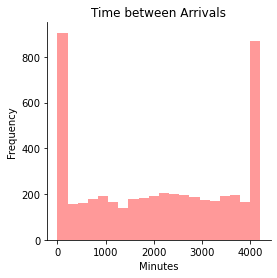

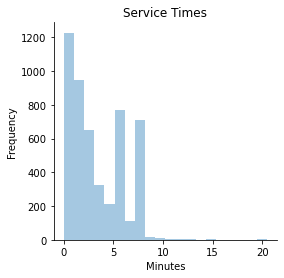

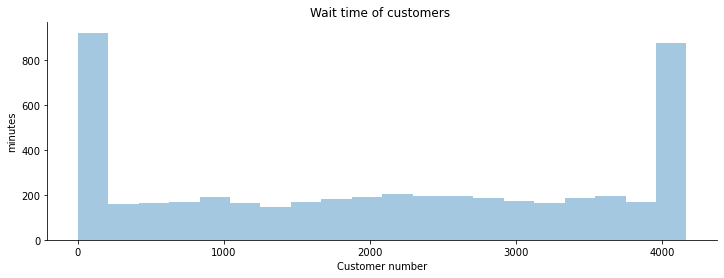


 Result for Queue2 
 Output: 
 Wq:  2179.5024819998207 
 W: 2183.540598653298 
Lq: 0.002280968485180293 
 p: 0.3923600614080608 
 L: 0.39464102989324074 



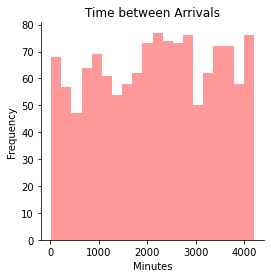

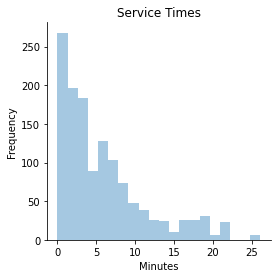

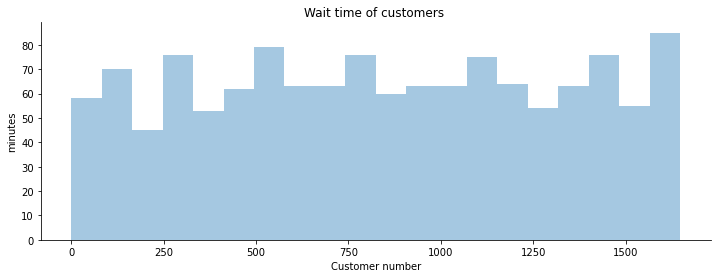


 Result for Queue3 
 Output: 
 Wq:  1542.0439805312683 
 W: 1544.9997901407392 
Lq: 0.00026810955128175353 
 p: 0.23313929832932842 
 L: 0.23340740788061107 



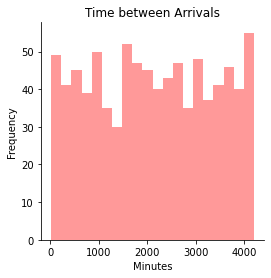

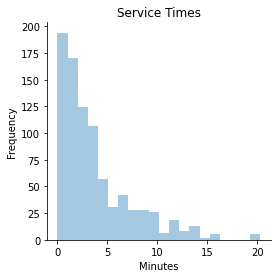

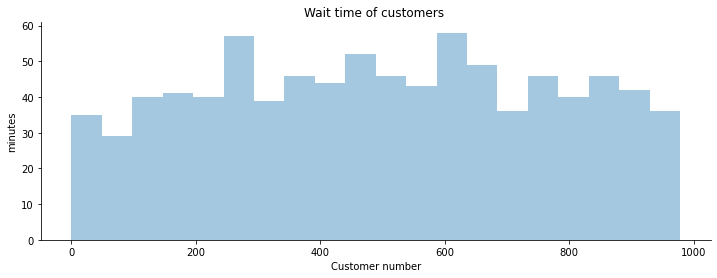

In [5]:

# Model Results
print('\n Result for Queue1 \n Output:','\n',
     'Wq: ',str(s.total_wait/s.num_departs),'\n',
     'W:',str((s.total_wait/s.num_departs)+(s.area_under_bt/s.num_departs)),'\n'
     'Lq:',str(s.area_under_qt/s.clock),'\n',
     'p:',str(s.sum_service/s.clock),'\n',
     'L:',str((s.area_under_qt/s.clock)+(s.area_under_bt/s.clock)),'\n')

plt.figure(figsize=(4,4))
sns.distplot(arrival_times,kde=False,color='r',bins=20)
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#service time distribution plot
plt.figure(figsize=(4,4))
sns.distplot(service_times,kde=False,bins=20)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(waiting_times,kde=False,bins=20)
plt.xlabel('Customer number')
plt.ylabel('minutes')
plt.title('Wait time of customers ')
sns.despine()
plt.show()

print('\n Result for Queue2 \n Output:','\n',
     'Wq: ',str(Server2.total_wait/Server2.num_departs),'\n',
     'W:',str((Server2.total_wait/Server2.num_departs)+(Server2.area_under_bt/Server2.num_departs)),'\n'
     'Lq:',str(Server2.area_under_qt/Server2.clock),'\n',
     'p:',str(Server2.sum_service/Server2.clock),'\n',
     'L:',str((Server2.area_under_qt/Server2.clock)+(Server2.area_under_bt/Server2.clock)),'\n')

plt.figure(figsize=(4,4))
sns.distplot(arrival_times2,kde=False,color='r',bins=20)
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#service time distribution plot
plt.figure(figsize=(4,4))
sns.distplot(service_times2,kde=False,bins=20)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(waiting_times2,kde=False,bins=20)
plt.xlabel('Customer number')
plt.ylabel('minutes')
plt.title('Wait time of customers ')
sns.despine()
plt.show()

print('\n Result for Queue3 \n Output:','\n',
     'Wq: ',str(Server3.total_wait/Server3.num_departs),'\n',
     'W:',str((Server3.total_wait/Server3.num_departs)+(Server3.area_under_bt/Server3.num_departs)),'\n'
     'Lq:',str(Server3.area_under_qt/Server3.clock),'\n',
     'p:',str(Server3.sum_service/Server3.clock),'\n',
     'L:',str((Server3.area_under_qt/Server3.clock)+(Server3.area_under_bt/Server3.clock)),'\n')

plt.figure(figsize=(4,4))
sns.distplot(arrival_times3,kde=False,color='r',bins=20)
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#service time distribution plot
plt.figure(figsize=(4,4))
sns.distplot(service_times3,kde=False,bins=20)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(waiting_times3,kde=False,bins=20)
plt.xlabel('Customer number')
plt.ylabel('minutes')
plt.title('Wait time of customers ')
sns.despine()
plt.show()


In [18]:
response_time1=(s.total_wait/s.num_departs)+(s.area_under_bt/s.num_departs)
response_time2=(Server2.total_wait/Server2.num_departs)+(Server2.area_under_bt/Server2.num_departs)
response_time3=(Server3.total_wait/Server3.num_departs)+(Server3.area_under_bt/Server3.num_departs)


print('\n Result for Queue1 \n Output:','\n',
     'Wq: ',str(s.total_wait/s.num_departs),'\n',
     'W:',str(response_time1),'\n'
     'Lq:',str(s.area_under_qt/s.clock),'\n',
     'p:',str(s.sum_service/s.clock),'\n',
     'L:',str((s.area_under_qt/s.clock)+(s.area_under_bt/s.clock)),'\n')

print('\n Result for Queue2 \n Output:','\n',
     'Wq: ',str(Server2.total_wait/Server2.num_departs),'\n',
     'W:',str(response_time2),'\n'
     'Lq:',str(Server2.area_under_qt/Server2.clock),'\n',
     'p:',str(Server2.sum_service/Server2.clock),'\n',
     'L:',str((Server2.area_under_qt/Server2.clock)+(Server2.area_under_bt/Server2.clock)),'\n')


print('\n Result for Queue3 \n Output:','\n',
     'Wq: ',str(Server3.total_wait/Server3.num_departs),'\n',
     'W:',str(response_time3),'\n'
     'Lq:',str(Server3.area_under_qt/Server3.clock),'\n',
     'p:',str(Server3.sum_service/Server3.clock),'\n',
     'L:',str((Server3.area_under_qt/Server3.clock)+(Server3.area_under_bt/Server3.clock)),'\n')

mean_responsetime=(response_time1+response_time2+response_time3)/3
arrival_rate=ncust/s.clock

mean_number_in_system=arrival_rate*mean_responsetime


print('\n Result for network \n Output:','\n',
     'R: ',str(mean_responsetime),'\n',
     'N:',str(mean_number_in_system),'\n')


 Result for Queue1 
 Output: 
 Wq:  835.1743125699165 
 W: 837.08684668079 
Lq: 3.0809118968837077 
 p: 0.9924581214500161 
 L: 4.073370018333724 


 Result for Queue2 
 Output: 
 Wq:  2179.5024819998207 
 W: 2183.540598653298 
Lq: 0.002280968485180293 
 p: 0.3923600614080608 
 L: 0.39464102989324074 


 Result for Queue3 
 Output: 
 Wq:  1542.0439805312683 
 W: 1544.9997901407392 
Lq: 0.00026810955128175353 
 p: 0.23313929832932842 
 L: 0.23340740788061107 


 Result for network 
 Output: 
 R:  1521.8757451582758 
 N: 1812.1534487177964 

